In [2]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [3]:
data = pd.read_csv('fullmap.csv')
data

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2023-04-03T03:06:57.764Z,52.7772,158.4839,105.631,6.50,mww,104.0,30.0,0.266,0.89,...,2023-04-07T14:54:54.824Z,NaN,earthquake,8.70,4.602,0.069,20.0,reviewed,us,us
1,2023-03-28T09:18:28.117Z,41.1480,142.8050,34.000,6.00,mww,175.0,44.0,0.906,0.73,...,2023-03-30T04:47:30.349Z,"129 km ENE of Misawa, Japan",earthquake,5.41,1.771,0.053,34.0,reviewed,us,us
2,2023-03-21T16:47:23.605Z,36.5186,70.9457,192.000,6.50,mww,164.0,12.0,2.510,0.93,...,2023-04-03T10:08:45.080Z,"Hindu Kush region, Afghanistan",earthquake,6.24,1.843,0.057,30.0,reviewed,us,us
3,2023-02-25T13:27:43.393Z,42.8435,144.9924,51.916,6.00,mww,146.0,32.0,1.591,0.63,...,2023-04-02T03:59:06.426Z,NaN,earthquake,7.58,1.442,0.052,35.0,reviewed,us,us
4,2023-02-23T00:37:38.620Z,38.0564,73.2299,11.742,6.90,mww,300.0,12.0,1.807,0.50,...,2023-03-21T17:11:17.019Z,"65 km WSW of Murghob, Tajikistan",earthquake,7.89,2.559,0.043,52.0,reviewed,us,us
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2110,1923-06-06T17:36:20.630Z,35.8190,142.6450,15.000,6.40,mw,NaN,NaN,NaN,NaN,...,2022-04-25T23:36:02.161Z,"164 km E of Hasaki, Japan",earthquake,NaN,10.500,0.200,NaN,reviewed,iscgem,iscgem
2111,1923-06-01T20:15:46.700Z,35.8850,141.4730,35.000,6.74,mw,NaN,NaN,NaN,NaN,...,2022-04-25T23:35:55.282Z,"60 km ENE of Hasaki, Japan",earthquake,NaN,12.400,0.200,NaN,reviewed,iscgem,iscgem
2112,1923-06-01T17:24:46.570Z,35.9360,141.5010,15.000,7.22,mw,NaN,NaN,NaN,NaN,...,2022-04-25T23:35:49.410Z,"64 km ENE of Hasaki, Japan",earthquake,NaN,12.400,0.280,NaN,reviewed,iscgem,iscgem
2113,1923-05-25T22:21:36.960Z,31.3080,56.1000,15.000,6.01,mw,NaN,NaN,NaN,NaN,...,2022-04-25T23:35:37.687Z,"34 km NW of Shahrak-e P?bed?n?, Iran",earthquake,NaN,25.000,0.200,NaN,reviewed,iscgem,iscgem


In [5]:
data.columns

Index(['time', 'latitude', 'longitude', 'depth', 'mag', 'magType', 'nst',
       'gap', 'dmin', 'rms', 'net', 'id', 'updated', 'place', 'type',
       'horizontalError', 'depthError', 'magError', 'magNst', 'status',
       'locationSource', 'magSource'],
      dtype='object')

In [4]:
data.drop(columns=['updated', 'id', 'status', 'nst', 'gap', 'dmin', 'rms', 'horizontalError', 'depthError', 'magError', 'magNst'], inplace=True)
data.head(10)

,time,latitude,longitude,depth,mag,magType,net,place,type,locationSource,magSource
0,2023-04-03T03:06:57.764Z,52.7772,158.4839,105.631,6.5,mww,us,NaN,earthquake,us,us
1,2023-03-28T09:18:28.117Z,41.1480,142.8050,34.000,6.0,mww,us,"129 km ENE of Misawa, Japan",earthquake,us,us
2,2023-03-21T16:47:23.605Z,36.5186,70.9457,192.000,6.5,mww,us,"Hindu Kush region, Afghanistan",earthquake,us,us
3,2023-02-25T13:27:43.393Z,42.8435,144.9924,51.916,6.0,mww,us,NaN,earthquake,us,us
4,2023-02-23T00:37:38.620Z,38.0564,73.2299,11.742,6.9,mww,us,"65 km WSW of Murghob, Tajikistan",earthquake,us,us
5,2023-02-20T17:04:29.761Z,36.1666,36.0302,16.000,6.3,mww,us,"2 km N of Uzunba?, Turkey",earthquake,us,us
6,2023-02-06T12:02:11.275Z,38.0582,36.5114,8.516,6.0,mb,us,"4 km NNE of Göksun, Turkey",earthquake,us,us
7,2023-02-06T10:26:46.742Z,38.0315,38.0984,10.000,6.0,mb,us,"12 km W of Çelikhan, Turkey",earthquake,us,us
8,2023-02-06T10:24:49.640Z,38.0080,37.2108,13.110,7.5,mww,us,"Elbistan earthquake, Kahramanmaras earthquake ...",earthquake,us,us
9,2023-02-06T01:28:15.784Z,37.1893,36.8929,9.797,6.7,mww,us,"14 km E of Nurda??, Turkey",earthquake,us,us


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2115 entries, 0 to 2114
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   time            2115 non-null   object 
 1   latitude        2115 non-null   float64
 2   longitude       2115 non-null   float64
 3   depth           2115 non-null   float64
 4   mag             2115 non-null   float64
 5   magType         2115 non-null   object 
 6   net             2115 non-null   object 
 7   place           2101 non-null   object 
 8   type            2115 non-null   object 
 9   locationSource  2115 non-null   object 
 10  magSource       2115 non-null   object 
dtypes: float64(4), object(7)
memory usage: 181.9+ KB


In [6]:
data.dropna(subset=['place'], inplace = True)
data.reset_index()
data

,time,latitude,longitude,depth,mag,magType,net,place,type,locationSource,magSource
1,2023-03-28T09:18:28.117Z,41.1480,142.8050,34.000,6.00,mww,us,"129 km ENE of Misawa, Japan",earthquake,us,us
2,2023-03-21T16:47:23.605Z,36.5186,70.9457,192.000,6.50,mww,us,"Hindu Kush region, Afghanistan",earthquake,us,us
4,2023-02-23T00:37:38.620Z,38.0564,73.2299,11.742,6.90,mww,us,"65 km WSW of Murghob, Tajikistan",earthquake,us,us
5,2023-02-20T17:04:29.761Z,36.1666,36.0302,16.000,6.30,mww,us,"2 km N of Uzunba?, Turkey",earthquake,us,us
6,2023-02-06T12:02:11.275Z,38.0582,36.5114,8.516,6.00,mb,us,"4 km NNE of Göksun, Turkey",earthquake,us,us
...,...,...,...,...,...,...,...,...,...,...,...
2110,1923-06-06T17:36:20.630Z,35.8190,142.6450,15.000,6.40,mw,iscgem,"164 km E of Hasaki, Japan",earthquake,iscgem,iscgem
2111,1923-06-01T20:15:46.700Z,35.8850,141.4730,35.000,6.74,mw,iscgem,"60 km ENE of Hasaki, Japan",earthquake,iscgem,iscgem
2112,1923-06-01T17:24:46.570Z,35.9360,141.5010,15.000,7.22,mw,iscgem,"64 km ENE of Hasaki, Japan",earthquake,iscgem,iscgem
2113,1923-05-25T22:21:36.960Z,31.3080,56.1000,15.000,6.01,mw,iscgem,"34 km NW of Shahrak-e P?bed?n?, Iran",earthquake,iscgem,iscgem


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2101 entries, 1 to 2114
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   time            2101 non-null   object 
 1   latitude        2101 non-null   float64
 2   longitude       2101 non-null   float64
 3   depth           2101 non-null   float64
 4   mag             2101 non-null   float64
 5   magType         2101 non-null   object 
 6   net             2101 non-null   object 
 7   place           2101 non-null   object 
 8   type            2101 non-null   object 
 9   locationSource  2101 non-null   object 
 10  magSource       2101 non-null   object 
dtypes: float64(4), object(7)
memory usage: 197.0+ KB


In [8]:
data.insert(0, 'date', data['time'].str[0:10] + ' ' + data['time'].str[11:19])
data['date'] = pd.to_datetime(data['date'], format = '%Y-%m-%d %H:%M:%S')
data.drop(columns=['time'], inplace=True)
data.head(10)

,date,latitude,longitude,depth,mag,magType,net,place,type,locationSource,magSource
1,2023-03-28 09:18:28,41.1480,142.8050,34.000,6.0,mww,us,"129 km ENE of Misawa, Japan",earthquake,us,us
2,2023-03-21 16:47:23,36.5186,70.9457,192.000,6.5,mww,us,"Hindu Kush region, Afghanistan",earthquake,us,us
4,2023-02-23 00:37:38,38.0564,73.2299,11.742,6.9,mww,us,"65 km WSW of Murghob, Tajikistan",earthquake,us,us
5,2023-02-20 17:04:29,36.1666,36.0302,16.000,6.3,mww,us,"2 km N of Uzunba?, Turkey",earthquake,us,us
6,2023-02-06 12:02:11,38.0582,36.5114,8.516,6.0,mb,us,"4 km NNE of Göksun, Turkey",earthquake,us,us
7,2023-02-06 10:26:46,38.0315,38.0984,10.000,6.0,mb,us,"12 km W of Çelikhan, Turkey",earthquake,us,us
8,2023-02-06 10:24:49,38.0080,37.2108,13.110,7.5,mww,us,"Elbistan earthquake, Kahramanmaras earthquake ...",earthquake,us,us
9,2023-02-06 01:28:15,37.1893,36.8929,9.797,6.7,mww,us,"14 km E of Nurda??, Turkey",earthquake,us,us
10,2023-02-06 01:17:34,37.2302,37.0190,10.000,7.8,mww,us,"Pazarcik earthquake, Kahramanmaras earthquake ...",earthquake,us,us
11,2023-01-05 14:25:53,36.4738,70.7455,203.000,6.0,mww,us,"44 km S of Jurm, Afghanistan",earthquake,us,us


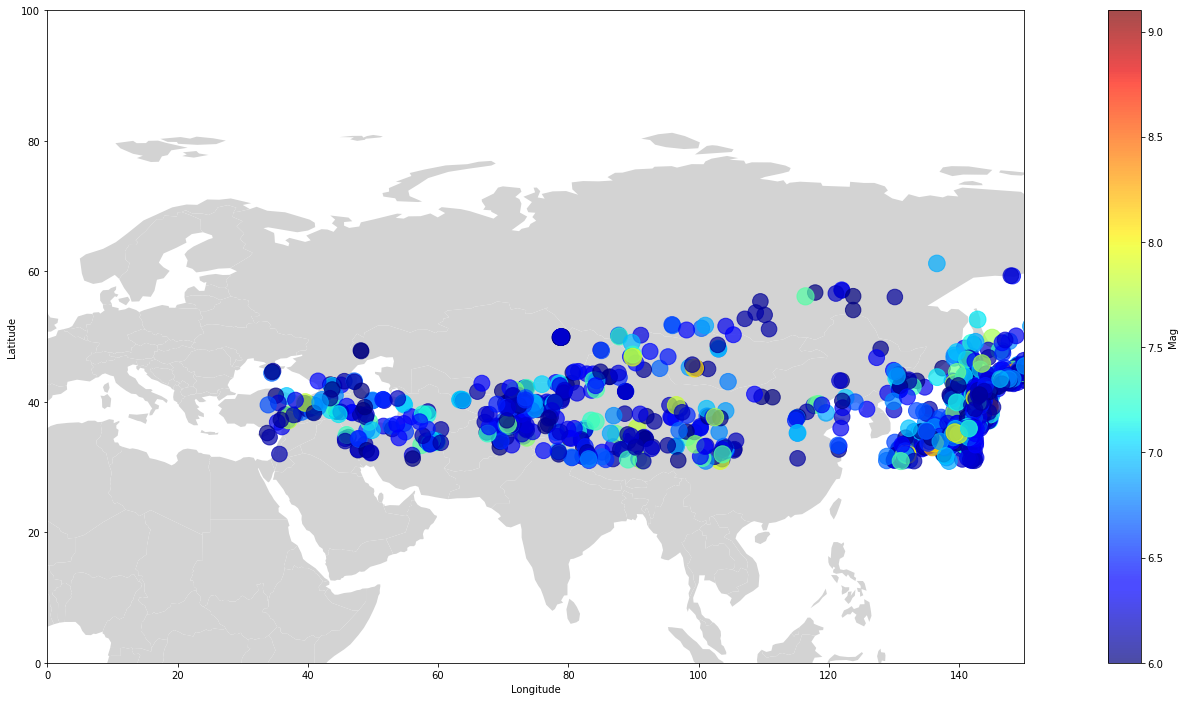

In [9]:
worldmap = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
fig, ax = plt.subplots(figsize=(30, 12))
worldmap.plot(color="lightgrey", ax=ax)
x = data['longitude']
y = data['latitude']

z = data['mag']
plt.scatter(x, y, s=40*z, c=z, alpha=0.7,
            cmap='jet')
plt.colorbar(label='Mag')

plt.xlim([0, 150])
plt.ylim([0, 100])

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

In [10]:
data.head(10)

,date,latitude,longitude,depth,mag,magType,net,place,type,locationSource,magSource
1,2023-03-28 09:18:28,41.1480,142.8050,34.000,6.0,mww,us,"129 km ENE of Misawa, Japan",earthquake,us,us
2,2023-03-21 16:47:23,36.5186,70.9457,192.000,6.5,mww,us,"Hindu Kush region, Afghanistan",earthquake,us,us
4,2023-02-23 00:37:38,38.0564,73.2299,11.742,6.9,mww,us,"65 km WSW of Murghob, Tajikistan",earthquake,us,us
5,2023-02-20 17:04:29,36.1666,36.0302,16.000,6.3,mww,us,"2 km N of Uzunba?, Turkey",earthquake,us,us
6,2023-02-06 12:02:11,38.0582,36.5114,8.516,6.0,mb,us,"4 km NNE of Göksun, Turkey",earthquake,us,us
7,2023-02-06 10:26:46,38.0315,38.0984,10.000,6.0,mb,us,"12 km W of Çelikhan, Turkey",earthquake,us,us
8,2023-02-06 10:24:49,38.0080,37.2108,13.110,7.5,mww,us,"Elbistan earthquake, Kahramanmaras earthquake ...",earthquake,us,us
9,2023-02-06 01:28:15,37.1893,36.8929,9.797,6.7,mww,us,"14 km E of Nurda??, Turkey",earthquake,us,us
10,2023-02-06 01:17:34,37.2302,37.0190,10.000,7.8,mww,us,"Pazarcik earthquake, Kahramanmaras earthquake ...",earthquake,us,us
11,2023-01-05 14:25:53,36.4738,70.7455,203.000,6.0,mww,us,"44 km S of Jurm, Afghanistan",earthquake,us,us


In [11]:
data.columns

Index(['date', 'latitude', 'longitude', 'depth', 'mag', 'magType', 'net',
       'place', 'type', 'locationSource', 'magSource'],
      dtype='object')

In [12]:
df = data.copy()
df.drop(columns=['magType', 'net',
       'place', 'type', 'locationSource', 'magSource'], axis = 1, inplace = True)
df.head(10)

,date,latitude,longitude,depth,mag
1,2023-03-28 09:18:28,41.1480,142.8050,34.000,6.0
2,2023-03-21 16:47:23,36.5186,70.9457,192.000,6.5
4,2023-02-23 00:37:38,38.0564,73.2299,11.742,6.9
5,2023-02-20 17:04:29,36.1666,36.0302,16.000,6.3
6,2023-02-06 12:02:11,38.0582,36.5114,8.516,6.0
7,2023-02-06 10:26:46,38.0315,38.0984,10.000,6.0
8,2023-02-06 10:24:49,38.0080,37.2108,13.110,7.5
9,2023-02-06 01:28:15,37.1893,36.8929,9.797,6.7
10,2023-02-06 01:17:34,37.2302,37.0190,10.000,7.8
11,2023-01-05 14:25:53,36.4738,70.7455,203.000,6.0


In [13]:
df['year'] = df['date'].dt.year
df.head(10)

,date,latitude,longitude,depth,mag,year
1,2023-03-28 09:18:28,41.1480,142.8050,34.000,6.0,2023
2,2023-03-21 16:47:23,36.5186,70.9457,192.000,6.5,2023
4,2023-02-23 00:37:38,38.0564,73.2299,11.742,6.9,2023
5,2023-02-20 17:04:29,36.1666,36.0302,16.000,6.3,2023
6,2023-02-06 12:02:11,38.0582,36.5114,8.516,6.0,2023
7,2023-02-06 10:26:46,38.0315,38.0984,10.000,6.0,2023
8,2023-02-06 10:24:49,38.0080,37.2108,13.110,7.5,2023
9,2023-02-06 01:28:15,37.1893,36.8929,9.797,6.7,2023
10,2023-02-06 01:17:34,37.2302,37.0190,10.000,7.8,2023
11,2023-01-05 14:25:53,36.4738,70.7455,203.000,6.0,2023


In [14]:
df.sort_values(by = ['date'], inplace = True)

In [15]:
df.head(20)

,date,latitude,longitude,depth,mag,year
2114,1923-05-23 22:37:06,53.277,161.949,15.0,6.63,1923
2113,1923-05-25 22:21:36,31.308,56.100,15.0,6.01,1923
2112,1923-06-01 17:24:46,35.936,141.501,15.0,7.22,1923
2111,1923-06-01 20:15:46,35.885,141.473,35.0,6.74,1923
2110,1923-06-06 17:36:20,35.819,142.645,15.0,6.40,1923
2109,1923-07-13 11:13:41,30.930,131.032,35.0,7.37,1923
2108,1923-08-12 06:10:10,33.381,142.521,15.0,6.36,1923
2107,1923-08-16 20:22:37,45.916,151.774,35.0,6.13,1923
2106,1923-09-01 02:58:35,35.274,139.344,15.0,7.96,1923
2105,1923-09-01 07:38:05,35.225,139.248,15.0,6.71,1923


<AxesSubplot:xlabel='year', ylabel='mag'>

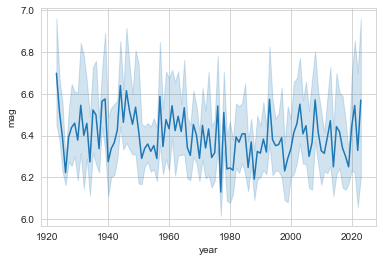

In [16]:
sns.set_style('whitegrid')
sns.lineplot(data = df, x = 'year', y = 'mag')

In [17]:
Y = df['mag'].values
Y = np.log(Y)
result = adfuller(Y)
print('Коэффициент расширенного теста Дики-Фуллера: %f' % result[0])
print('Критические значения: %f' % result[1])
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

Коэффициент расширенного теста Дики-Фуллера: -18.588451
Критические значения: 0.000000
	1%: -3.433
	5%: -2.863
	10%: -2.568


In [18]:
train_data, test_data = df[0:int(len(df) * 0.8)], df[int(len(df) * 0.8):]

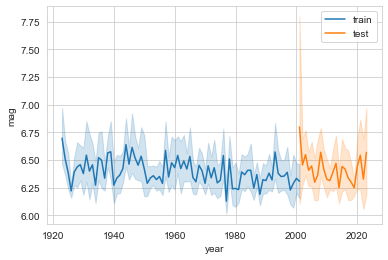

In [19]:
train_data, test_data = df[0:int(len(df) * 0.8)], df[int(len(df) * 0.8):]
sns.lineplot(data = train_data, x = train_data['year'], y = train_data['mag'], label = "train")
sns.lineplot(data = test_data, x = test_data['year'], y = test_data['mag'], label = "test")
plt.show()

In [20]:
#Симметричная средняя абсолютная ошибка в процентах
def smape_kun(y_true, y_pred):
    return np.mean((np.abs(y_pred - y_true) * 200/ (np.abs(y_pred) + np.abs(y_true))))

In [21]:
train_ar = train_data['mag'].values
test_ar = test_data['mag'].values

history = [x for x in train_ar]
predictions = list()
for t in range(len(test_ar)):
    model = SARIMAX(history, order = (5, 1, 0)) # Параметризуем модель
    model_fit = model.fit(disp = 0) # Передадим обучающие данные
    output = model_fit.forecast() # Сгенерируем предсказания
    yhat = output[0] # Сделаем первое предсказание отдельной переменной
    predictions.append(yhat) # Добавим в список предсказаний первое значение
    obs = test_ar[t] # Создадим служебную переменную obs (observation)
    history.append(obs) # Пополним служебной переменной список history 
  
error = mean_squared_error(test_ar, predictions)
print('Тестовая среднеквадратическая ошибка: %.3f' % error)
error2 = smape_kun(test_ar, predictions)
print('Симметричная средняя абсолютная ошибка в процентах: %.3f' % error2)

Тестовая среднеквадратическая ошибка: 0.244
Симметричная средняя абсолютная ошибка в процентах: 5.515


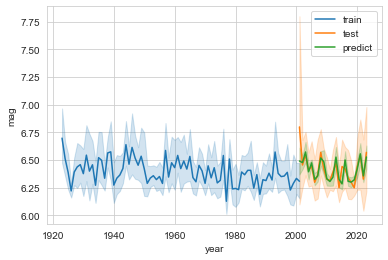

In [22]:
train_data, test_data = df[0:int(len(df) * 0.8)], df[int(len(df) * 0.8):]
sns.lineplot(data = train_data, x = train_data['year'], y = train_data['mag'], label = "train")
sns.lineplot(data = test_data, x = test_data['year'], y = test_data['mag'], label = "test")
sns.lineplot(data = test_data,x = test_data['year'], y = predictions, label = 'predict')
plt.show()

In [28]:
df_kaggle = pd.read_csv('dataset.csv')
df_kaggle.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


In [29]:
lst_columns_withMag = ['Date', 'Latitude', 'Longitude', 'Depth', 'Magnitude']

In [30]:
df_kaggle = df_kaggle[lst_columns_withMag]

In [31]:
df_kaggle.head()

,Date,Latitude,Longitude,Depth,Magnitude
0,01/02/1965,19.246,145.616,131.6,6.0
1,01/04/1965,1.863,127.352,80.0,5.8
2,01/05/1965,-20.579,-173.972,20.0,6.2
3,01/08/1965,-59.076,-23.557,15.0,5.8
4,01/09/1965,11.938,126.427,15.0,5.8


In [32]:
lst_columns_withoutMag = ['Date', 'Latitude', 'Longitude', 'Depth']

In [33]:
df_kaggle_withoutMag = df_kaggle[lst_columns_withoutMag]

In [34]:
df_kaggle_withoutMag.head()

,Date,Latitude,Longitude,Depth
0,01/02/1965,19.246,145.616,131.6
1,01/04/1965,1.863,127.352,80.0
2,01/05/1965,-20.579,-173.972,20.0
3,01/08/1965,-59.076,-23.557,15.0
4,01/09/1965,11.938,126.427,15.0


In [35]:
row_number = df_kaggle_withoutMag.shape[0]

In [36]:
df_kaggle_withoutMag['mag'] = model_fit.predict(start = 0, end = row_number - 1)

In [37]:
df_kaggle_withoutMag.head()

,Date,Latitude,Longitude,Depth,mag
0,01/02/1965,19.246,145.616,131.6,0.000000
1,01/04/1965,1.863,127.352,80.0,6.629999
2,01/05/1965,-20.579,-173.972,20.0,6.327841
3,01/08/1965,-59.076,-23.557,15.0,6.599586
4,01/09/1965,11.938,126.427,15.0,6.622247


In [38]:
df_kaggle.head()

,Date,Latitude,Longitude,Depth,Magnitude
0,01/02/1965,19.246,145.616,131.6,6.0
1,01/04/1965,1.863,127.352,80.0,5.8
2,01/05/1965,-20.579,-173.972,20.0,6.2
3,01/08/1965,-59.076,-23.557,15.0,5.8
4,01/09/1965,11.938,126.427,15.0,5.8


In [39]:
test_kaggle = df_kaggle['Magnitude'].values
prediction_kaggle = df_kaggle_withoutMag['mag'].values

In [40]:
error = mean_squared_error(test_kaggle, prediction_kaggle)
print('Тестовая среднеквадратическая ошибка: %.3f' % error)
error2 = smape_kun(test_kaggle, prediction_kaggle)
print('Симметричная средняя абсолютная ошибка в процентах: %.3f' % error2)

Тестовая среднеквадратическая ошибка: 0.534
Симметричная средняя абсолютная ошибка в процентах: 10.970


In [41]:
years = pd.Series(list(range(2024, 2075, 5)))

In [42]:
latitude = list(df['latitude'][0:11])
longitude = list(df['longitude'][0:11])
depth = list(df['depth'][0:11])

In [43]:
df_next = pd.DataFrame({'Date' : years, 'latitude' : None, 'longtitude' : None, 'depth' : None, 'mag' : None})

In [44]:
df_next.head()

,Date,latitude,longtitude,depth,mag
0,2024,None,None,None,None
1,2029,None,None,None,None
2,2034,None,None,None,None
3,2039,None,None,None,None
4,2044,None,None,None,None


In [45]:
df_next['latitude'] = latitude
df_next['longtitude'] = longitude
df_next['depth'] = depth

In [46]:
df_next

,Date,latitude,longtitude,depth,mag
0,2024,53.277,161.949,15.0,None
1,2029,31.308,56.100,15.0,None
2,2034,35.936,141.501,15.0,None
3,2039,35.885,141.473,35.0,None
4,2044,35.819,142.645,15.0,None
5,2049,30.930,131.032,35.0,None
6,2054,33.381,142.521,15.0,None
7,2059,45.916,151.774,35.0,None
8,2064,35.274,139.344,15.0,None
9,2069,35.225,139.248,15.0,None


In [47]:
final_data = df_next[['Date', 'latitude', 'longtitude', 'depth']]

In [48]:
final_data = final_data.values

In [49]:
final_data

array([[2024.   ,   53.277,  161.949,   15.   ],
       [2029.   ,   31.308,   56.1  ,   15.   ],
       [2034.   ,   35.936,  141.501,   15.   ],
       [2039.   ,   35.885,  141.473,   35.   ],
       [2044.   ,   35.819,  142.645,   15.   ],
       [2049.   ,   30.93 ,  131.032,   35.   ],
       [2054.   ,   33.381,  142.521,   15.   ],
       [2059.   ,   45.916,  151.774,   35.   ],
       [2064.   ,   35.274,  139.344,   15.   ],
       [2069.   ,   35.225,  139.248,   15.   ],
       [2074.   ,   34.985,  139.928,   15.   ]])

In [50]:
df_next['mag'] = model_fit.predict(start = 0, end = 10)

In [51]:
df_next

,Date,latitude,longtitude,depth,mag
0,2024,53.277,161.949,15.0,0.000000
1,2029,31.308,56.100,15.0,6.629999
2,2034,35.936,141.501,15.0,6.327841
3,2039,35.885,141.473,35.0,6.599586
4,2044,35.819,142.645,15.0,6.622247
5,2049,30.930,131.032,35.0,6.629024
6,2054,33.381,142.521,15.0,6.680334
7,2059,45.916,151.774,35.0,6.700765
8,2064,35.274,139.344,15.0,6.753576
9,2069,35.225,139.248,15.0,6.755134
